# 대표적인 언더샘플링 알고리즘 : NearMiss
---
- 가장 가까운 n개의 소수 클래스 샘플까지의 `평균 거리가 짧은` 다수 클래스 샘플을 순서대로 제거하는 방식
    - 소수 클래스 샘플까지의 평균거리가 짧다 = 가깝다. = 해당 샘플이 결정 경계에 있다.
    - 즉, 결정 경계에 위치한 샘플을 파악하기 위해 소수 클래스 샘플까지의 평균거리를 구하는 것이다.

- 이론상으로는 가장 가까운 n개의 소수라고 한다. 하지만 실제로는 n을 따로 설정하지 않는다.<br><br>
    - 보통은 `n = 소수 클래스 샘플의 수` 로 설정한다.


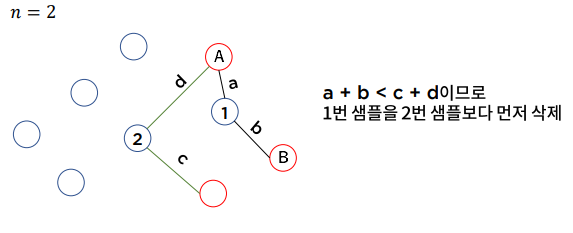

- 평균 거리라고는 하지만, 실제로는 대상 클래스 샘플의 수는 모두 동일하게 n개이다.<br><br>
- 따라서 평균이 아니라 각 거리의 합이어도 결과는 같다.

# 관련 문법 : imblearn.under_sampling.NearMiss
---

**파라미터**
- sampling_strategy : 입력하지 않으면 1:1 비율이 맞춰질대까지 샘플을 생성. 사전 형태로 입력하여 클래스별로 생성하는 샘플의 수를 조절할 수도 있다.
- n_neighbors : 평균 거리를 구하는 소수 클래스의 샘플 수
- version : NearMiss의 version. 
    - version은 1, 2, 3이 존재한다. 하지만 **가장 보편적으로 쓰는 version은 2이다.**<br><br>
    - version을 1로 설정하면 위의 이론 설명때처럼 n값(소수 클래스 샘플의 수) 를 지정하는 파라미터가 하나 더 늘어난다.<br><br>
    - **version을 2로 설정하면 모든 소수 클래스 샘플 까지의 평균 거리를 사용**한다.<br><br>
    - 즉, 어차피 보편적으로 사용하는 방식은 `n = 소수 클래스 샘플의 수` 이므로 파라미터를 늘릴 필요없이 version 2를 사용하는 것이 효율적인 코딩이 될 것이다.<br><br>

**주요 메서드**
- .fit_sample(X,Y) : X와 Y에 대해서 NearMiss를 적용한 결과를 ndarray 형태로 return
    - 일반적인 sklearn의 함수처럼  fit과 sample이 따로 있지 않고 하나의 메서드로 적용된다.
    - Test data에는 적용하면 안되고, 할 필요도 없기 때문 (메서드 하나로 바로 fit하여 sample을 return)

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

웹페이지의 특정 부분이 text인지 image인지를 정리한 언더샘플링 실습용 데이터

In [2]:
df = pd.read_csv("page-blocks0.csv")
df.head()

,Height,Lenght,Area,Eccen,P_black,P_and,Mean_tr,Blackpix,Blackand,Wb_trans,Class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,negative
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,negative
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,negative
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,negative
4,6,3,18,500.000,0.500,0.944,2.25,9,17,4,negative


In [3]:
# 특징과 라벨 분리
X = df.drop('Class', axis = 1)
Y = df['Class']

In [4]:
# 학습 데이터와 평가 데이터 분할
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [5]:
# 특징개수 확인 -> 10개정도 밖에 되지 않음
Train_X.shape

(4104, 10)

In [6]:
# 클래스 불균형 확인
Train_Y.value_counts()

negative    3702
positive     402
Name: Class, dtype: int64

- 문자형인 label을 숫자형으로 변경

In [7]:
Train_Y.replace({"negative":-1, "positive":1}, inplace = True)
Test_Y.replace({"negative":-1, "positive":1}, inplace = True)

# 클래스 불균형 탐색

## 클래스 불균형 테스트 by 클래스 불균형 비율 측정

In [8]:
# 클래스 불균형 비율 계산
Train_Y.value_counts().iloc[0] / Train_Y.value_counts().iloc[-1]

9.208955223880597

- 보편적 비율인 9보다는 낮지만, 거의 근사한 값으로 불균형이 존재할 수 있다 판단할 수 있다.

## 클래스 불균형 테스트 by KNN

In [9]:
# kNN을 사용한 클래스 불균형 테스트
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *

# 모델 인스턴스 생성
kNN_model = KNN(n_neighbors = 11).fit(Train_X, Train_Y)

# 예측
pred_Y = kNN_model.predict(Test_X)

# 재현율 & 정확도
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.7070063694267515
0.9568713450292398


## 불균형 탐색 결론

- 재현율이 60%로 불균형이 심각한 수준은 아닌 것으로 보인다. (불균형 이기는 함)
- 특징수도 많지 않고, 불균형인 positive 클래스의 샘플도 상당하므로 언더 샘플링으로 resampling을 하는 것이 적합해 보인다.

# 언더샘플링 NearMiss (5:5)

In [10]:
from imblearn.under_sampling import NearMiss
NM_model = NearMiss(version = 2) # version = 2: 모든 소수 클래스 샘플까지의 평균 거리를 활용

# NearMiss 적용
# 결과값인 ndarray를 DataFrame과 Series로 변환 
# 남은 전처리가 없다면 하지 않아도 된다.
u_Train_X, u_Train_Y = NM_model.fit_sample(Train_X, Train_Y)
u_Train_X = pd.DataFrame(u_Train_X, columns = X.columns)
u_Train_Y = pd.Series(u_Train_Y)

In [11]:
u_Train_Y.value_counts()

-1    402
 1    402
Name: Class, dtype: int64

In [12]:
# kNN 재적용을 통한 성능 변화 확인
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *
kNN_model = KNN(n_neighbors = 11).fit(u_Train_X, u_Train_Y)
pred_Y = kNN_model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

# 재현율은 크게 올랐으나, 정확도가 크게 떨어짐 => 적당한 비율에 맞게 설정해야 함

0.9363057324840764
0.22076023391812866


- 재현율은 93%로 크게 올랐지만, 정확도가 95% -> 20%대로 급격하게 하락했다.
- 소수 클래스에 대한 결정공간이 너무 넓어져서 다수 클래스를 제대로 판별하지 못하게 되었다.


- 즉, 5:5의 비율은 적절하지 못하므로 언더 샘플링 비율을 조정해줄 필요가 있어 보인다.

# 비율을 조정한 NearMiss (5:1)

In [13]:
from imblearn.under_sampling import NearMiss

# sampling_strategy을 적용 (클래스별 비율을 사전형태로 입력)
# 클래스 명 : 생성할 샘플 수 (생성하고 난 뒤에 남게 되는 목표 샘플 수)
# 5:1 정도의 비율로 언더샘플링 재수행
NM_model = NearMiss(version = 2, sampling_strategy = {1:u_Train_Y.value_counts().iloc[-1],
                                                      -1:u_Train_Y.value_counts().iloc[-1] * 5}) 


# NearMiss 적용
# 결과값인 ndarray를 DataFrame과 Series로 변환 
# 남은 전처리가 없다면 하지 않아도 된다.
u_Train_X, u_Train_Y = NM_model.fit_sample(Train_X, Train_Y)
u_Train_X = pd.DataFrame(u_Train_X, columns = X.columns)
u_Train_Y = pd.Series(u_Train_Y)

In [14]:
u_Train_Y.value_counts()

-1    2010
 1     402
Name: Class, dtype: int64

In [15]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *
kNN_model = KNN(n_neighbors = 11).fit(u_Train_X, u_Train_Y)
pred_Y = kNN_model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.8726114649681529
0.6637426900584795


- 재현율이 87%, 정확도가 66%로 변경되었다.
- 만약 정확도를 좀 더 높이고 싶다면 [-1:u_Train_Y.value_counts().iloc[-1] * 5] 부분의 비율을 더 늘리면된다.
- 이때, 원본 데이터의 비율을 초과해서는 안된다. (resampling 하는 의미가 없음)